# 数据探测

In [23]:
import os
from os import walk 
import numpy as np 
import time 


print(os.listdir('../../data/refuse_data'))

for (dirpath, dirnames, filenames) in walk('../../data/refuse_data'):
    print("*"*10)
    print("director path:", dirpath)
    print("total examples:", len(filenames))
    print("file name examples:", filenames[:3])

['train', 'train.txt', 'val', 'val.txt']
**********
director path: ../../data/refuse_data
total examples: 2
file name examples: ['train.txt', 'val.txt']
**********
director path: ../../data/refuse_data\train
total examples: 0
file name examples: []
**********
director path: ../../data/refuse_data\train\0
total examples: 1300
file name examples: ['img_10.jpg', 'img_100.jpg', 'img_1001.jpg']
**********
director path: ../../data/refuse_data\train\1
total examples: 2701
file name examples: ['img_2210.jpg', 'img_2211.jpg', 'img_2215.jpg']
**********
director path: ../../data/refuse_data\train\2
total examples: 6912
file name examples: ['img_10000.jpg', 'img_10001.jpg', 'img_10002.jpg']
**********
director path: ../../data/refuse_data\train\3
total examples: 928
file name examples: ['img_18238.jpg', 'img_18239.jpg', 'img_18241.jpg']
**********
director path: ../../data/refuse_data\val
total examples: 0
file name examples: []
**********
director path: ../../data/refuse_data\val\0
total exampl

# 数据预处理
## 导入图像分类库

In [24]:
import torch 
from torchvision import datasets,models,transforms
from matplotlib import pyplot as plt
import numpy as np 
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = 'SimHei'

## 定义数据输入

In [25]:
label_dict = {
    "0": "其他垃圾/一次性快餐盒",
    "1": "其他垃圾/污损塑料",
    "2": "其他垃圾/烟蒂",
    "3": "其他垃圾/牙签",
    "4": "其他垃圾/破碎花盆及碟碗",
    "5": "其他垃圾/竹筷",
    "6": "厨余垃圾/剩饭剩菜",
    "7": "厨余垃圾/大骨头",
    "8": "厨余垃圾/水果果皮",
    "9": "厨余垃圾/水果果肉",
    "10": "厨余垃圾/茶叶渣",
    "11": "厨余垃圾/菜叶菜根",
    "12": "厨余垃圾/蛋壳",
    "13": "厨余垃圾/鱼骨",
    "14": "可回收物/充电宝",
    "15": "可回收物/包",
    "16": "可回收物/化妆品瓶",
    "17": "可回收物/塑料玩具",
    "18": "可回收物/塑料碗盆",
    "19": "可回收物/塑料衣架",
    "20": "可回收物/快递纸袋",
    "21": "可回收物/插头电线",
    "22": "可回收物/旧衣服",
    "23": "可回收物/易拉罐",
    "24": "可回收物/枕头",
    "25": "可回收物/毛绒玩具",
    "26": "可回收物/洗发水瓶",
    "27": "可回收物/玻璃杯",
    "28": "可回收物/皮鞋",
    "29": "可回收物/砧板",
    "30": "可回收物/纸板箱",
    "31": "可回收物/调料瓶",
    "32": "可回收物/酒瓶",
    "33": "可回收物/金属食品罐",
    "34": "可回收物/锅",
    "35": "可回收物/食用油桶",
    "36": "可回收物/饮料瓶",
    "37": "有害垃圾/干电池",
    "38": "有害垃圾/软膏",
    "39": "有害垃圾/过期药物"
}

In [26]:
# 数据tensor 运行方式：cpu cuda
device = torch.device('cuda' if torch.cuda.is_available()  else 'cpu')
print("device:", device)

# 定义数据路径
TRAIN = '../../data/refuse_data/train'
VAL = '../../data/refuse_data/val'

print("train_path:", TRAIN)
print("test_path:", VAL)

device: cpu
train_path: ../../data/refuse_data/train
test_path: ../../data/refuse_data/val


## 原始垃圾数据显示


In [27]:
train_data = datasets.ImageFolder(TRAIN)
val_data = datasets.ImageFolder(VAL)

In [28]:
help(datasets.ImageFolder(TRAIN))

Help on ImageFolder in module torchvision.datasets.folder object:

class ImageFolder(DatasetFolder)
 |  ImageFolder(root, transform=None, target_transform=None, loader=<function default_loader at 0x000001E801D51488>)
 |  
 |  A generic data loader where the images are arranged in this way: ::
 |  
 |      root/dog/xxx.png
 |      root/dog/xxy.png
 |      root/dog/xxz.png
 |  
 |      root/cat/123.png
 |      root/cat/nsdf3.png
 |      root/cat/asd932_.png
 |  
 |  Args:
 |      root (string): Root directory path.
 |      transform (callable, optional): A function/transform that  takes in an PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      loader (callable, optional): A function to load an image given its path.
 |  
 |   Attributes:
 |      classes (list): List of the class names.
 |      class_to_idx (dict): Dict with

In [29]:
len(train_data.imgs)

11841

train_data.imgs 中的每张图片，进行可视化展示，看看原始数据的样子

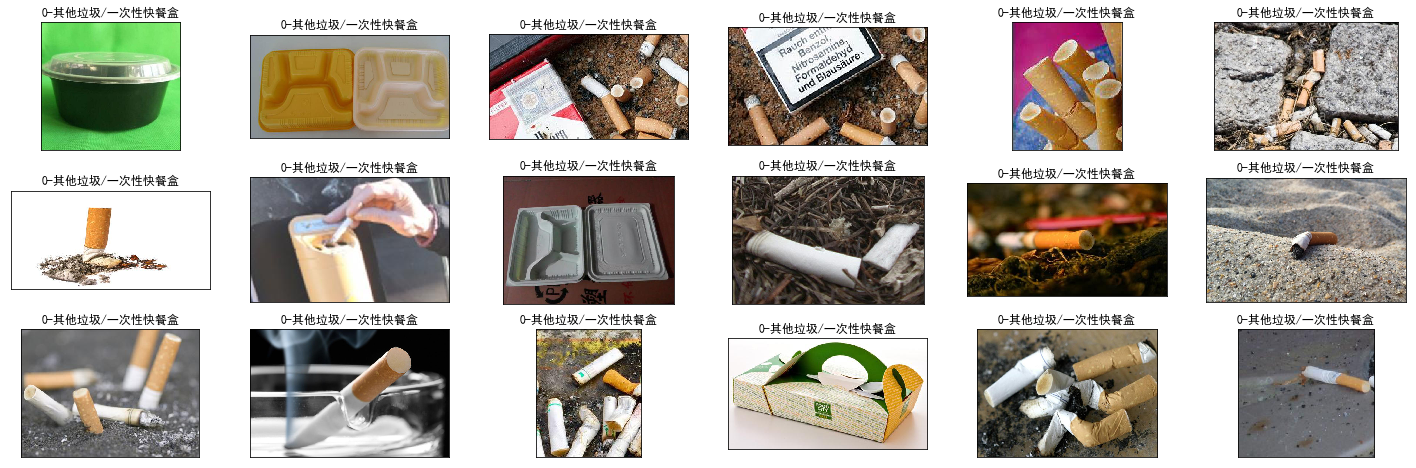

In [30]:
from PIL import Image
fig = plt.figure(figsize=(25,8))
for idx,img in enumerate(train_data.imgs[:18]):
    
    # ax 图表示例
    ax = fig.add_subplot(3,18/3,idx+1,xticks=[],yticks=[])
    file_name_path = img[0]
    target_idx = img[1]
    #print(idx,file_name_path,target_idx)
    target_name = label_dict.get(str(target_idx),"")
    # 绘制图表
    image = Image.open(file_name_path)
    plt.imshow(image)
    ax.set_title('{}-{}'.format(target_idx,target_name))

## 数据预处理过程

In [31]:
# 定义预处理方法
train_transforms = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)
val_transforms = transforms.Compose([
        transforms.Resize((256, 256)), 
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
)


### 数据格式转换
print("TRAIN:", TRAIN)
train_data = datasets.ImageFolder(
    TRAIN,
    transform=train_transforms
)

val_data = datasets.ImageFolder(
    VAL,
    transform=val_transforms
)

print(len(train_data))
print(len(val_data))

TRAIN: ../../data/refuse_data/train
11841
2961


那么转换后的数据格式是什么样的？ 我们重点关注imgs 和 class_to_idx 属性

In [32]:
train_data.imgs[:2]

[('../../data/refuse_data/train\\0\\img_10.jpg', 0),
 ('../../data/refuse_data/train\\0\\img_100.jpg', 0)]

In [33]:
print(train_data.class_to_idx)

{'0': 0, '1': 1, '2': 2, '3': 3}


In [34]:
assert train_data.class_to_idx.keys() == val_data.class_to_idx.keys()
class_list = [str(i) for i in list(range(40))]
print(class_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']


In [35]:
help(train_data.class_to_idx)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwarg